# Disney Wait Times Analysis with respect to weather

## Importing and testing 

In [2]:
import pandas as pd

weather = pd.read_csv('./data/weather_data.csv')
wait_times = pd.read_csv('./data/waiting_times.csv')

In [3]:
wait_times.describe

<bound method NDFrame.describe of           WORK_DATE                 DEB_TIME  ...  DOWNTIME NB_MAX_UNIT
0        2018-01-01  2018-01-01 21:00:00.000  ...         0         2.0
1        2018-01-01  2018-01-01 19:30:00.000  ...         0        18.0
2        2018-01-01  2018-01-01 22:30:00.000  ...         0         2.0
3        2018-01-01  2018-01-01 12:45:00.000  ...         0         1.0
4        2018-01-01  2018-01-01 17:00:00.000  ...         0        16.0
...             ...                      ...  ...       ...         ...
3509319  2022-08-18  2022-08-18 18:45:00.000  ...         0         1.0
3509320  2022-08-18  2022-08-18 10:15:00.000  ...         0         1.0
3509321  2022-08-18  2022-08-18 09:15:00.000  ...         0         1.0
3509322  2022-08-18  2022-08-18 20:30:00.000  ...         0        24.0
3509323  2022-08-18  2022-08-18 10:45:00.000  ...         0         2.0

[3509324 rows x 14 columns]>

In [4]:
weather.describe

<bound method NDFrame.describe of                 dt  ... weather_icon
0        915148800  ...          01n
1        915152400  ...          01n
2        915156000  ...          02n
3        915159600  ...          03n
4        915163200  ...          04n
...            ...  ...          ...
207259  1661281200  ...          04n
207260  1661284800  ...          04n
207261  1661288400  ...          04n
207262  1661292000  ...          04n
207263  1661295600  ...          01n

[207264 rows x 28 columns]>

## Creating two new df's from weather and wait_times for merging

In [5]:
wait_times_new = wait_times.copy()
wait_times_new = wait_times_new.dropna(subset=['CAPACITY', 'WAIT_TIME_MAX'], how='any')
wait_times_new['DateTime'] = pd.to_datetime(wait_times_new['DEB_TIME'])

wait_times_new['DEB_TIME'] = pd.to_datetime(wait_times_new['DEB_TIME'])

wait_times_new_rapids = wait_times_new[(wait_times_new['CAPACITY'] != 0) & (wait_times_new['ENTITY_DESCRIPTION_SHORT'] == "Rapids Ride")]

wait_times_new_rapids = wait_times_new_rapids[['DEB_TIME', 'ENTITY_DESCRIPTION_SHORT', 'WAIT_TIME_MAX', 'GUEST_CARRIED', 'ADJUST_CAPACITY']]

wait_times_new_rapids

,DEB_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY
44,2018-01-01 11:00:00,Rapids Ride,5,7.000,154.1170
99,2018-01-01 11:15:00,Rapids Ride,5,0.000,0.0000
127,2018-01-01 11:45:00,Rapids Ride,5,7.000,165.2500
173,2018-01-01 12:30:00,Rapids Ride,5,30.000,165.2500
360,2018-01-01 17:00:00,Rapids Ride,5,16.000,88.1333
...,...,...,...,...,...
3508931,2022-08-18 16:00:00,Rapids Ride,15,241.001,330.2500
3508940,2022-08-18 11:30:00,Rapids Ride,15,241.001,330.2500
3509077,2022-08-18 10:30:00,Rapids Ride,5,241.001,330.2500
3509103,2022-08-18 12:15:00,Rapids Ride,15,241.001,330.2500


In [6]:
weather_new = weather.copy()
weather_new = weather_new.dropna(subset=['dt', 'temp'], how='any')
weather_new['DateTime'] = pd.to_datetime(weather_new['dt'], unit='s')
weather_new['year'] = weather_new['DateTime'].dt.year
weather_new['hour'] = weather_new['DateTime'].dt.hour
weather_new = weather_new[weather_new['year'] >= 2018]

weather_new['DEB_TIME'] = pd.to_datetime(weather_new['dt'], unit='s')
weather_new = weather_new[['DEB_TIME', 'year', 'hour', 'temp', 'dew_point', 'feels_like']]

weather_new



,DEB_TIME,year,hour,temp,dew_point,feels_like
166560,2018-01-01 00:00:00,2018,0,8.94,4.56,5.21
166561,2018-01-01 01:00:00,2018,1,8.07,3.72,4.09
166562,2018-01-01 02:00:00,2018,2,7.76,3.42,3.81
166563,2018-01-01 03:00:00,2018,3,7.57,3.43,3.63
166564,2018-01-01 04:00:00,2018,4,6.86,3.30,2.88
...,...,...,...,...,...,...
207259,2022-08-23 19:00:00,2022,19,24.89,18.34,25.18
207260,2022-08-23 20:00:00,2022,20,23.06,18.18,23.35
207261,2022-08-23 21:00:00,2022,21,21.83,18.42,22.18
207262,2022-08-23 22:00:00,2022,22,21.08,18.46,21.46


### Merging

In [7]:
matching_rapids = pd.merge(wait_times_new_rapids, weather_new, on=['DEB_TIME'], how='inner')

matching_rapids

,DEB_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY,year,hour,temp,dew_point,feels_like
0,2018-01-01 11:00:00,Rapids Ride,5,7.0000,154.1170,2018,11,6.35,4.99,1.46
1,2018-01-01 17:00:00,Rapids Ride,5,16.0000,88.1333,2018,17,7.76,5.57,3.30
2,2018-01-01 14:00:00,Rapids Ride,5,2.0000,22.0333,2018,14,9.12,7.40,5.31
3,2018-01-01 15:00:00,Rapids Ride,5,103.0000,165.2500,2018,15,8.07,5.70,3.99
4,2018-01-01 13:00:00,Rapids Ride,5,36.0002,165.2500,2018,13,8.34,7.28,4.22
...,...,...,...,...,...,...,...,...,...,...
12210,2022-08-18 19:00:00,Rapids Ride,25,241.0010,330.2500,2022,19,24.20,17.69,24.43
12211,2022-08-18 15:00:00,Rapids Ride,20,241.0010,330.2500,2022,15,28.06,17.59,28.80
12212,2022-08-18 14:00:00,Rapids Ride,20,241.0010,330.2500,2022,14,28.20,16.48,28.58
12213,2022-08-18 16:00:00,Rapids Ride,15,241.0010,330.2500,2022,16,27.46,18.74,28.60


## Scatter plot of GUEST_CARRIED from Rapids Ride compared to feels_like

Text(0.5, 1.0, 'Guests Carried vs Temperature')

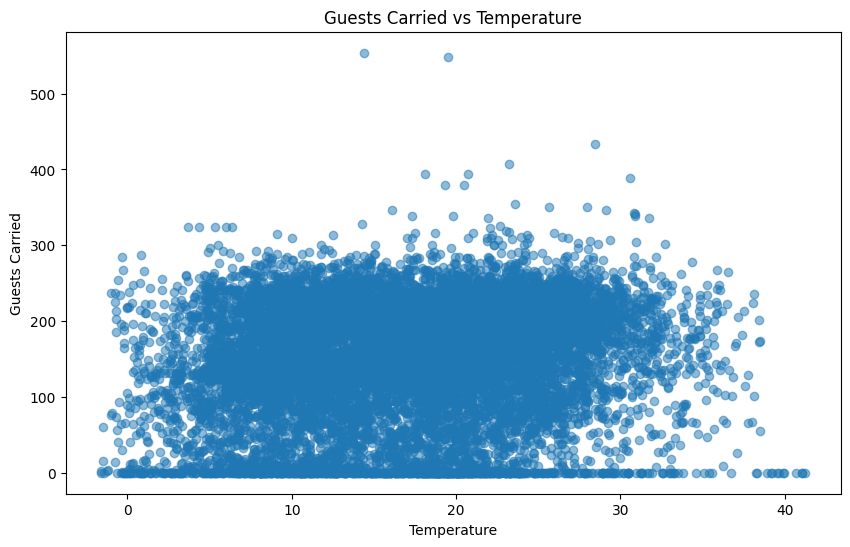

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(10,6))
plt.scatter(matching_rapids['temp'], matching_rapids['GUEST_CARRIED'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Guests Carried')
plt.title('Guests Carried vs Temperature')


### Doesn't seem to be any clear correlation from data on whether weather affects wait times

## Testing Hypothesis using Pearsons Correlation 

In [9]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(matching_rapids['temp'], matching_rapids['GUEST_CARRIED'])
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.1451221353124031, p-value: 1.7617370742340568e-58


### Low correlation value confirms the hyopthesis from the graph. But since the dataset is so large, the this value could be forced lower due to the averaging across the dataset. Even 0.14 could be signifcant if we have thousands of rows. The p-value of ~0 confirms that this correlation value is statistically significant. But there are some outlying points that seem to be incorrect. 

In [10]:
matching_rapids = matching_rapids[matching_rapids['GUEST_CARRIED'] < matching_rapids['ADJUST_CAPACITY']]

Text(0.5, 1.0, 'Guests Carried vs Temperature')

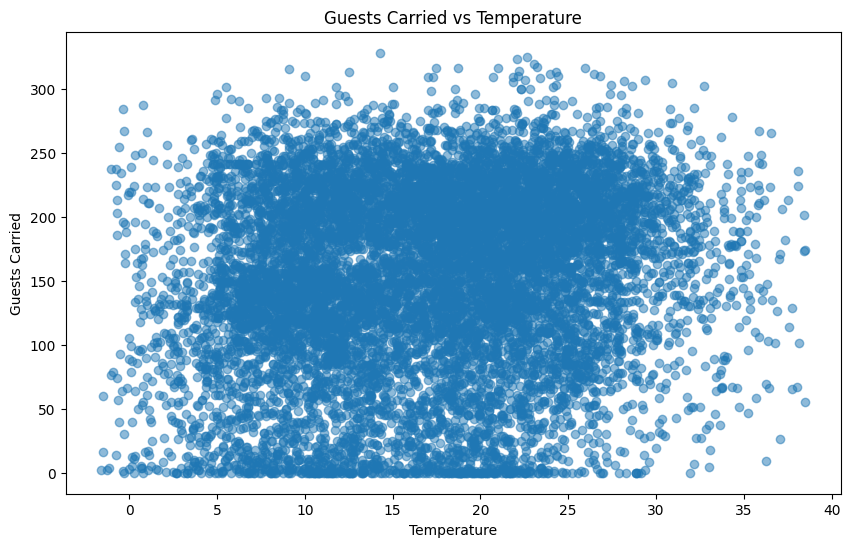

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(matching_rapids['temp'], matching_rapids['GUEST_CARRIED'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Guests Carried')
plt.title('Guests Carried vs Temperature')

In [12]:
corr, p_value = pearsonr(matching_rapids['temp'], matching_rapids['GUEST_CARRIED'])
print(f"Correlation: {corr}, p-value: {p_value}")

Correlation: 0.16175564768352846, p-value: 3.0298558425167843e-68


### Similar correlation and p-value even with the outliers removed. Correlation slightly higher at .16

## Graphing using boxplot

### Since the Pearsons correlation didn't help too much to determine if there is a correlation, split the data into boxes to see if we can find a statistically significant difference between them

<function matplotlib.pyplot.show(close=None, block=None)>

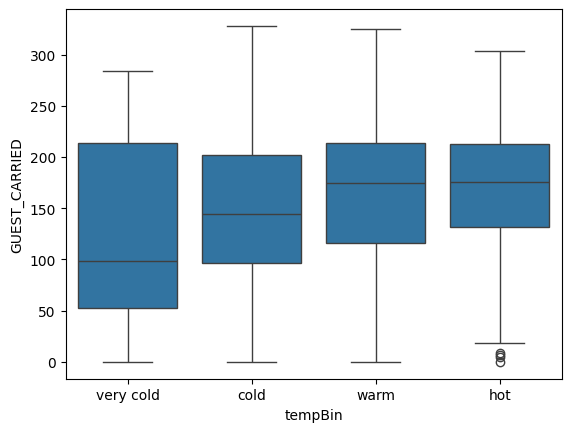

In [13]:
import seaborn as sns
matching_rapids_copy = matching_rapids.copy()
matching_rapids_copy['tempBin'] = pd.cut(matching_rapids_copy['temp'], bins=[-10, 0, 15, 30, 50], labels=['very cold', 'cold', 'warm', 'hot'])
sns.boxplot(x='tempBin', y='GUEST_CARRIED', data=matching_rapids_copy)
plt.show

### In the hot column, there are a substantial amount of outliers that suggest that the true mean of the hot bin is greater than shown.

## Pivot Table test to determine what test I can use on boxplot

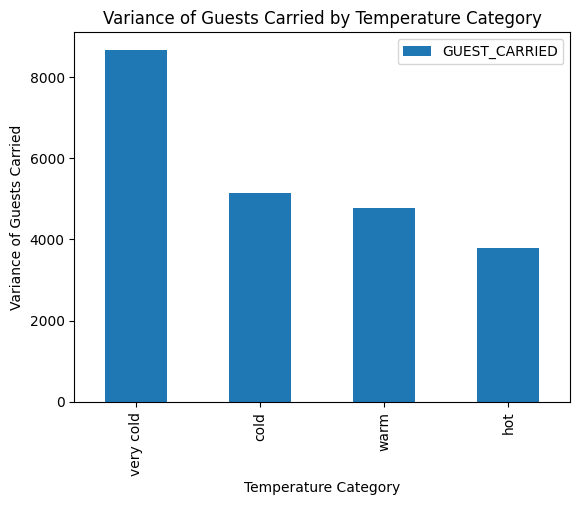

In [14]:
pivot = matching_rapids_copy.pivot_table(values='GUEST_CARRIED', index='tempBin', aggfunc='var', observed=True)

pivot.plot(kind='bar')
plt.title('Variance of Guests Carried by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Variance of Guests Carried')
plt.show()

### Very high variance differences

## Using Kruskal-Wallis H Test (ANOVA alternative test for when variance differs significantly and data is not necessarily normal) on boxplot

In [15]:
from scipy.stats import kruskal
very_cold = matching_rapids_copy[matching_rapids_copy['tempBin'] == 'very cold']['GUEST_CARRIED']
cold = matching_rapids_copy[matching_rapids_copy['tempBin'] == 'cold']['GUEST_CARRIED']
warm = matching_rapids_copy[matching_rapids_copy['tempBin'] == 'warm']['GUEST_CARRIED']
hot = matching_rapids_copy[matching_rapids_copy['tempBin'] == 'hot']['GUEST_CARRIED']

kruskal_result= kruskal(very_cold, cold, warm, hot)
print('Kruskal-Wallis H-statistic: ', kruskal_result.statistic)
print('Kruskal-Wallis p-value', kruskal_result.pvalue)

Kruskal-Wallis H-statistic:  187.06415307904115
Kruskal-Wallis p-value 2.6288991363383633e-40


### This Kruskal-Wallis H-statistic calculation of 187 states that there is a great difference between the temperature groups. The low p-value of ~0 affirms this statement. From this test, it seems that there could be a statistically significant difference between the groups. Now, take a look at the means.

In [16]:
print(matching_rapids_copy.groupby('tempBin', observed=True)['GUEST_CARRIED'].mean())

tempBin
very cold    126.694436
cold         143.444355
warm         160.951771
hot          166.625948
Name: GUEST_CARRIED, dtype: float64


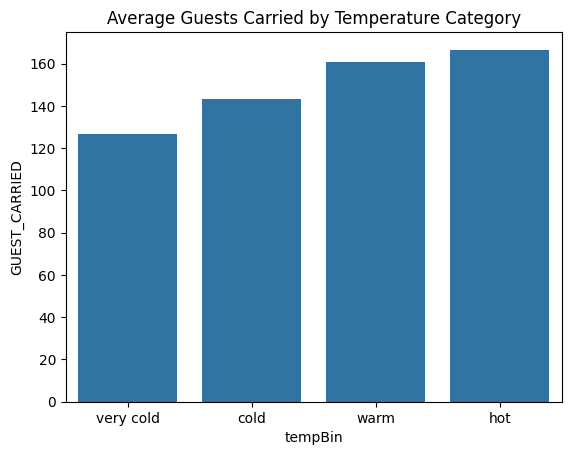

In [17]:
sns.barplot(x='tempBin', y='GUEST_CARRIED', data=matching_rapids_copy, errorbar=None)
plt.title('Average Guests Carried by Temperature Category')
plt.show()

### As we can see, there seems to be a steady increase of guests carried across the boxes. This affirms our Kruskal Wallis test.

## Correlation Matrix just to see

<function matplotlib.pyplot.show(close=None, block=None)>

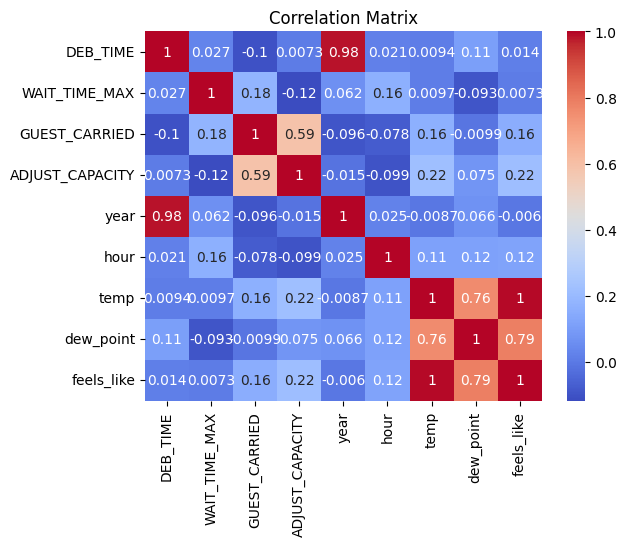

In [18]:
correlation_df = matching_rapids.drop(columns=['ENTITY_DESCRIPTION_SHORT'], inplace=False)
correlation_matrix = correlation_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

### We can see through this test that there is some correlation between temperature and guests carried. It might not look too significant, but it is there nonetheless.

## Overall, we can conclude that weather does affect the wait times for specific rides at Disneyland Paris, particularly the rapids ride. The Pearson's correlation test showed a weak linear relationship between weather and wait times, with a correlation coefficient of 0.16 when correcting the data. Although this correlation is statistically significant (p-value of ~0), it is not practically meaningful due to its minimal strength and the large amount of data used. However, the Kruskal-Wallis H test, which is more robust to non-linear relationships and differences in variances, reveals that when weather is categorized into bins of very cold, cold, warm, and hot, there are statistically significant differences in wait times across these categories. This indicates that different weather conditions have a notable impact on wait times, with significant variations observed between the different temperature bins. So, if you wish to beat the lines for the rapids ride, be sure to go when the temperature is lower. 

# Now Using Scikit to try and create a model

## Setting up the df

In [84]:
wait_times_sk = wait_times.copy()
wait_times_sk['DateTime'] = pd.to_datetime(wait_times_sk['DEB_TIME'])

wait_times_sk['WORK_DATE'] = pd.to_datetime(wait_times_sk['WORK_DATE'])
wait_times_sk['DAY'] = wait_times_sk['WORK_DATE'].dt.day_name()
wait_times_sk['MONTH'] = wait_times_sk['WORK_DATE'].dt.month_name()

wait_times_sk['DEB_TIME'] = pd.to_datetime(wait_times_sk['DEB_TIME'])

wait_times_sk = wait_times_sk[(wait_times_sk['CAPACITY'] != 0) & (wait_times_sk['ENTITY_DESCRIPTION_SHORT'] == "Rapids Ride")]

wait_times_sk = wait_times_sk[['DEB_TIME', 'WAIT_TIME_MAX', 'GUEST_CARRIED', 'ADJUST_CAPACITY', 'MONTH', 'DAY', 'OPEN_TIME', 'NB_UNITS']]
wait_times_sk

,DEB_TIME,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY,MONTH,DAY,OPEN_TIME,NB_UNITS
44,2018-01-01 11:00:00,5,7.000,154.1170,January,Monday,15,2.0
99,2018-01-01 11:15:00,5,0.000,0.0000,January,Monday,15,2.0
127,2018-01-01 11:45:00,5,7.000,165.2500,January,Monday,15,1.0
173,2018-01-01 12:30:00,5,30.000,165.2500,January,Monday,15,1.0
360,2018-01-01 17:00:00,5,16.000,88.1333,January,Monday,8,1.0
...,...,...,...,...,...,...,...,...
3508931,2022-08-18 16:00:00,15,241.001,330.2500,August,Thursday,15,2.0
3508940,2022-08-18 11:30:00,15,241.001,330.2500,August,Thursday,15,2.0
3509077,2022-08-18 10:30:00,5,241.001,330.2500,August,Thursday,15,2.0
3509103,2022-08-18 12:15:00,15,241.001,330.2500,August,Thursday,15,2.0


In [85]:
weather_sk = weather.copy()
weather_sk = weather_sk.dropna(subset=['dt', 'temp'], how='any')
weather_sk['DateTime'] = pd.to_datetime(weather_sk['dt'], unit='s')
weather_sk['year'] = weather_sk['DateTime'].dt.year
weather_sk['hour'] = weather_sk['DateTime'].dt.hour
weather_sk = weather_sk[weather_sk['year'] >= 2018]

weather_sk['DEB_TIME'] = pd.to_datetime(weather_sk['dt'], unit='s')

weather_sk = weather_sk.drop(columns=['dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'visibility', 'weather_id', 'weather_icon', 'sea_level', 'grnd_level', 'DateTime'])

weather_sk

,dt,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,year,hour,DEB_TIME
166560,1514764800,8.94,4.56,5.21,7.70,9.60,1007,74,8.32,233,NaN,NaN,NaN,NaN,NaN,23,Clouds,few clouds,2018,0,2018-01-01 00:00:00
166561,1514768400,8.07,3.72,4.09,7.70,8.60,1008,74,8.26,238,NaN,NaN,NaN,NaN,NaN,4,Clear,sky is clear,2018,1,2018-01-01 01:00:00
166562,1514772000,7.76,3.42,3.81,7.31,7.94,1009,74,7.81,240,NaN,NaN,NaN,NaN,NaN,27,Clouds,scattered clouds,2018,2,2018-01-01 02:00:00
166563,1514775600,7.57,3.43,3.63,6.74,7.94,1010,75,7.59,241,NaN,NaN,NaN,NaN,NaN,78,Clouds,broken clouds,2018,3,2018-01-01 03:00:00
166564,1514779200,6.86,3.30,2.88,5.74,7.60,1010,78,7.06,237,NaN,NaN,NaN,NaN,NaN,52,Clouds,broken clouds,2018,4,2018-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207259,1661281200,24.89,18.34,25.18,23.74,25.86,1016,67,1.34,297,1.51,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,19,2022-08-23 19:00:00
207260,1661284800,23.06,18.18,23.35,21.38,24.86,1017,74,0.70,345,0.76,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,20,2022-08-23 20:00:00
207261,1661288400,21.83,18.42,22.18,19.71,23.86,1017,81,0.70,345,0.76,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,21,2022-08-23 21:00:00
207262,1661292000,21.08,18.46,21.46,19.90,22.86,1017,85,0.70,345,0.76,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,22,2022-08-23 22:00:00


In [86]:
merged_sk = pd.merge(wait_times_sk, weather_sk, on=['DEB_TIME'])
merged_sk

,DEB_TIME,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY,MONTH,DAY,OPEN_TIME,NB_UNITS,dt,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,year,hour
0,2018-01-01 11:00:00,5,7.0000,154.1170,January,Monday,15,2.0,1514804400,6.35,4.99,1.46,5.86,7.32,1002,91,9.69,186,NaN,2.01,NaN,NaN,NaN,100,Rain,moderate rain,2018,11
1,2018-01-01 17:00:00,5,16.0000,88.1333,January,Monday,8,1.0,1514826000,7.76,5.57,3.30,7.31,7.94,1001,86,9.77,285,NaN,0.25,NaN,NaN,NaN,100,Rain,light rain,2018,17
2,2018-01-01 14:00:00,5,2.0000,22.0333,January,Monday,15,1.0,1514815200,9.12,7.40,5.31,8.74,9.74,997,89,8.85,232,NaN,0.18,NaN,NaN,NaN,97,Rain,light rain,2018,14
3,2018-01-01 15:00:00,5,103.0000,165.2500,January,Monday,15,1.0,1514818800,8.07,5.70,3.99,7.70,8.60,997,85,8.63,237,NaN,2.34,NaN,NaN,NaN,72,Rain,moderate rain,2018,15
4,2018-01-01 13:00:00,5,36.0002,165.2500,January,Monday,15,1.0,1514811600,8.34,7.28,4.22,7.86,9.32,997,93,9.12,215,NaN,0.82,NaN,NaN,NaN,83,Rain,light rain,2018,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210,2022-08-18 19:00:00,25,241.0010,330.2500,August,Thursday,15,2.0,1660849200,24.20,17.69,24.43,22.81,25.12,1013,67,2.77,301,4.79,NaN,NaN,NaN,NaN,100,Clouds,overcast clouds,2022,19
12211,2022-08-18 15:00:00,20,241.0010,330.2500,August,Thursday,15,2.0,1660834800,28.06,17.59,28.80,26.16,29.85,1012,53,3.52,282,3.85,NaN,NaN,NaN,NaN,94,Clouds,overcast clouds,2022,15
12212,2022-08-18 14:00:00,20,241.0010,330.2500,August,Thursday,15,2.0,1660831200,28.20,16.48,28.58,26.31,29.34,1012,49,3.52,282,3.85,NaN,NaN,NaN,NaN,94,Clouds,overcast clouds,2022,14
12213,2022-08-18 16:00:00,15,241.0010,330.2500,August,Thursday,15,2.0,1660838400,27.46,18.74,28.60,26.14,28.89,1012,59,3.52,282,3.85,NaN,NaN,NaN,NaN,94,Clouds,overcast clouds,2022,16


## Encoding data using One-Hot Encoding

In [87]:
merged_sk = pd.get_dummies(merged_sk, columns=['DAY', 'MONTH', 'weather_main', 'weather_description'])

In [88]:
merged_sk = merged_sk.drop(columns=['DEB_TIME'])
merged_sk = merged_sk.fillna(0)
merged_sk.dtypes

WAIT_TIME_MAX                                 int64
GUEST_CARRIED                               float64
ADJUST_CAPACITY                             float64
OPEN_TIME                                     int64
NB_UNITS                                    float64
dt                                            int64
temp                                        float64
dew_point                                   float64
feels_like                                  float64
temp_min                                    float64
temp_max                                    float64
pressure                                      int64
humidity                                      int64
wind_speed                                  float64
wind_deg                                      int64
wind_gust                                   float64
rain_1h                                     float64
rain_3h                                     float64
snow_1h                                     float64
snow_3h     

## Testing to see what is important

<function matplotlib.pyplot.show(close=None, block=None)>

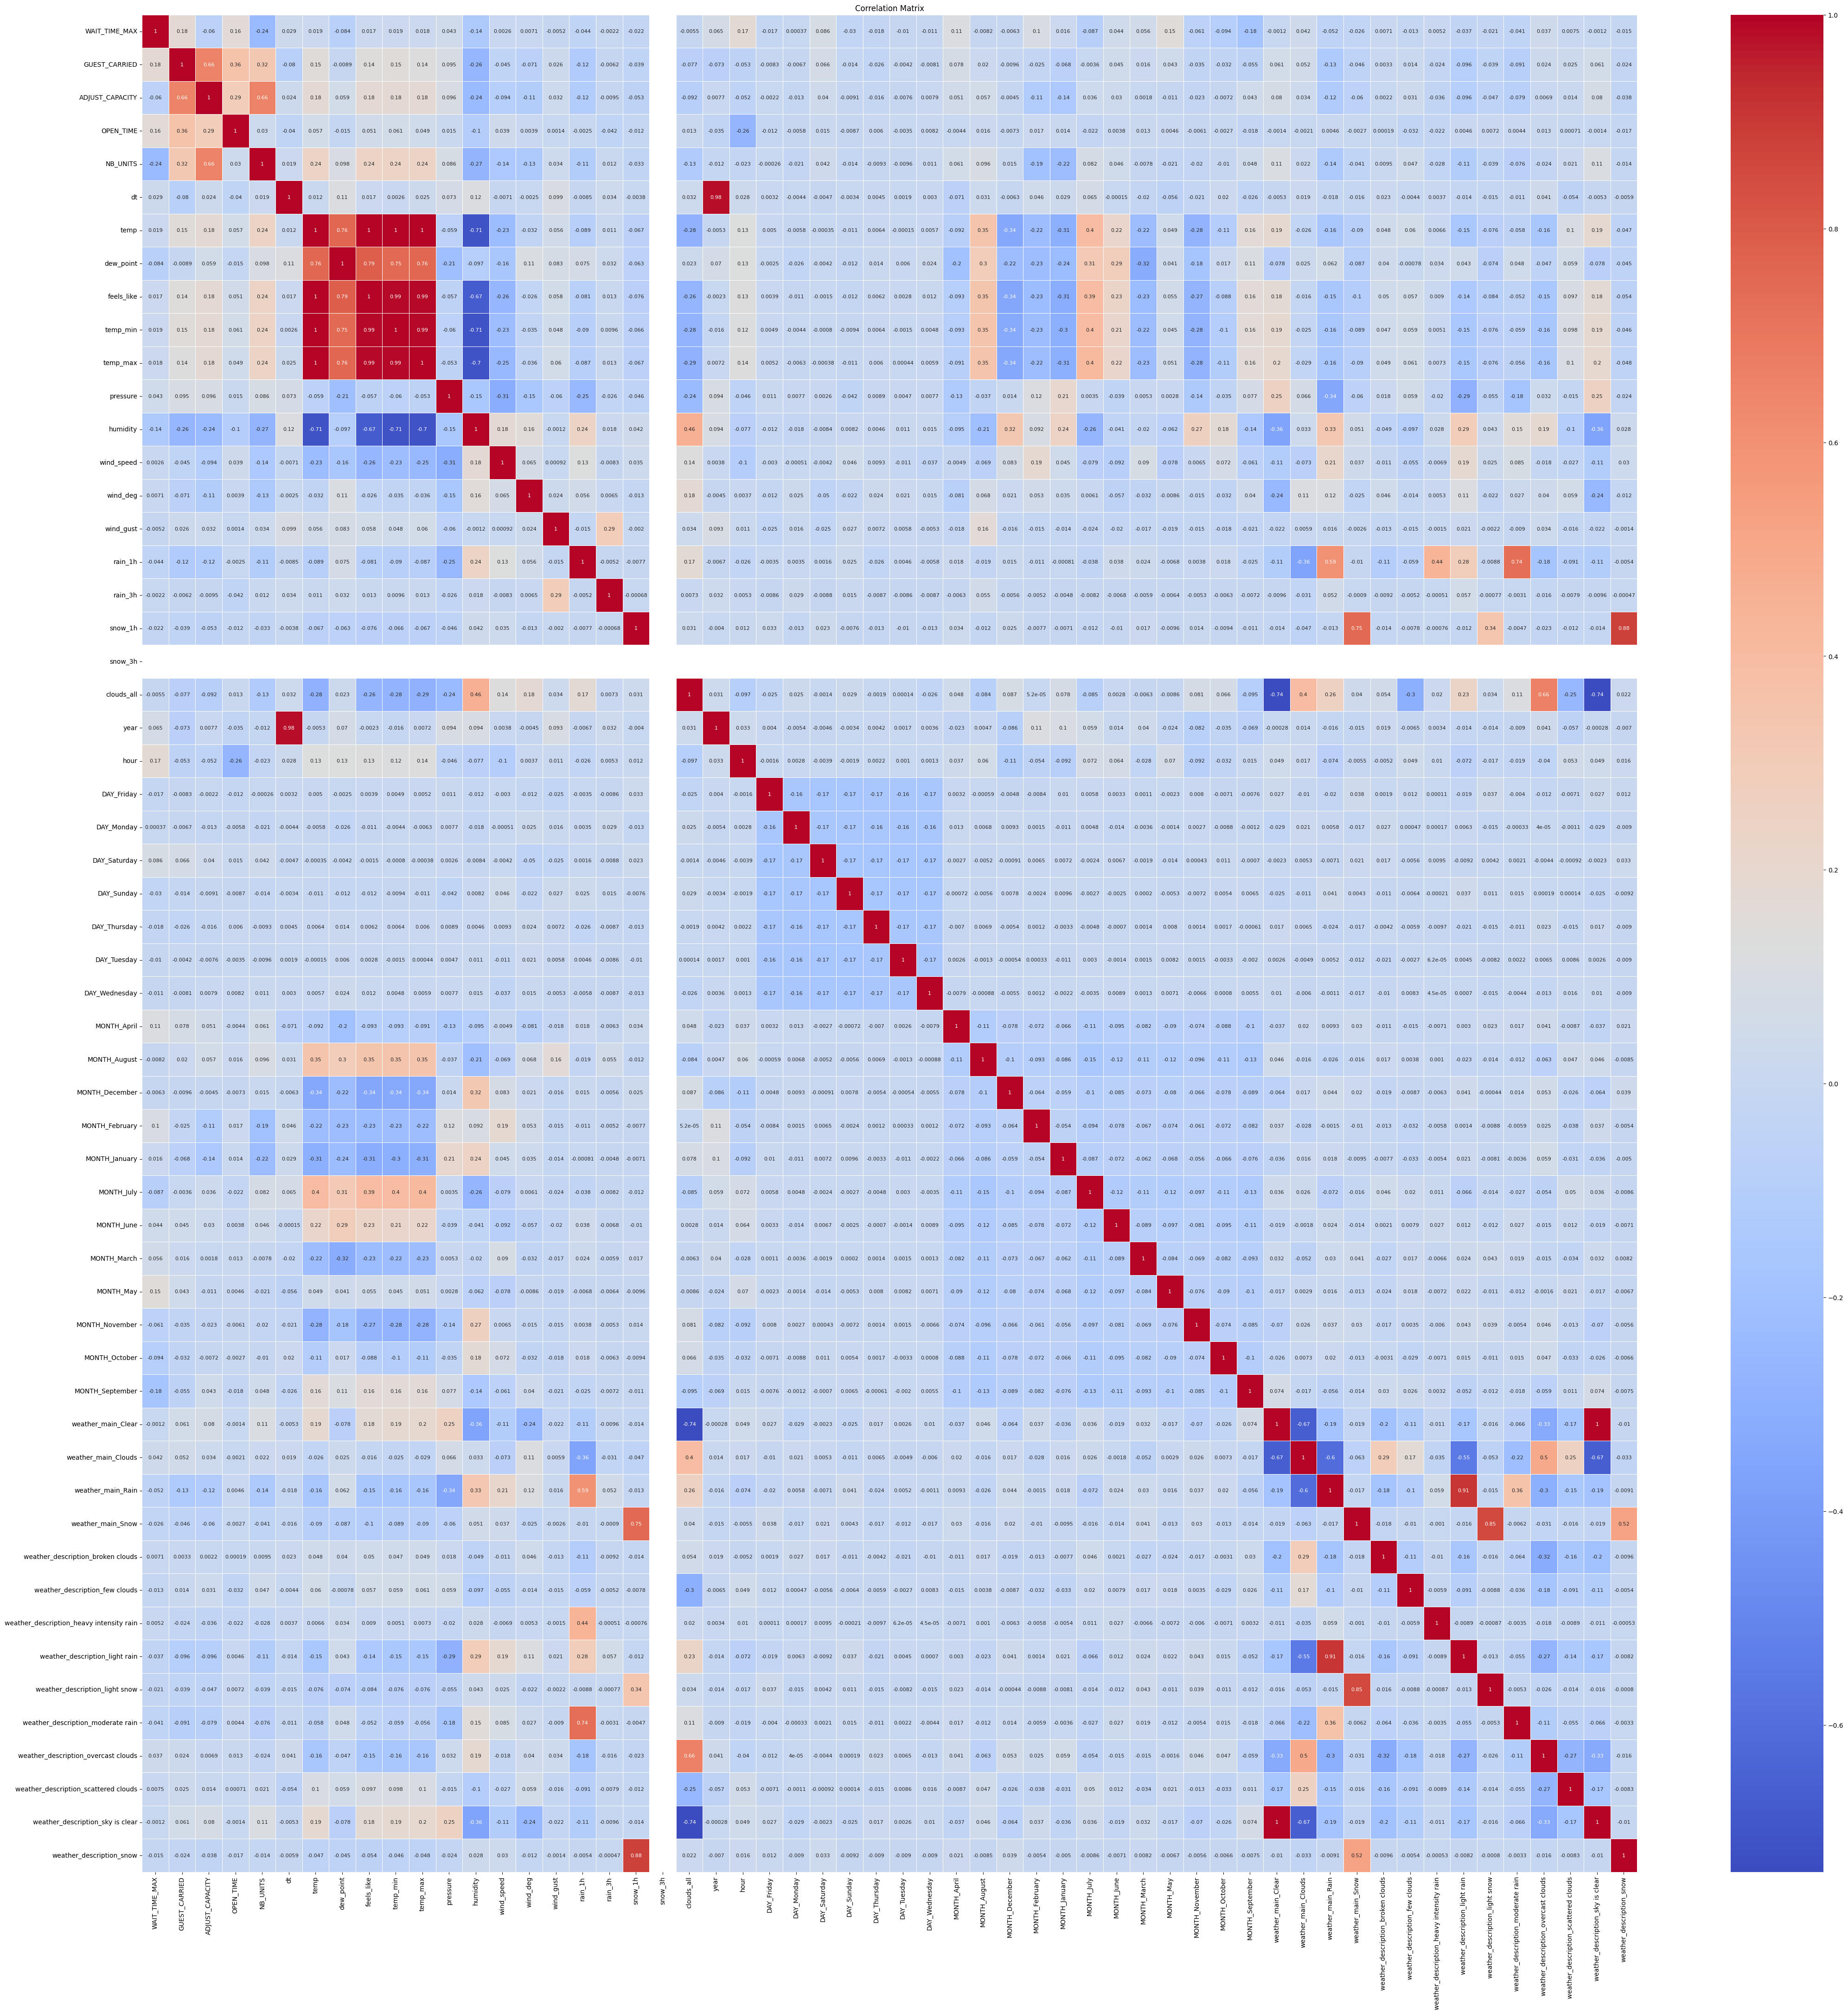

In [89]:
correlation_matrix2 = merged_sk.corr()

plt.figure(figsize=(52, 52))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show

#### I would say for GUEST_CARRIED these are what matter most and what I will use to create the model --> OPEN_TIME, NB_UNITS, temp, temp_min, temp_max, feels_like, humidity, rain_1h, weather_main_Rain

In [90]:
merged_sk = merged_sk[merged_sk['GUEST_CARRIED'] != 0] #Removing 0s since they are skewing the data and I believe that there are many false 0s
merged_sk

,WAIT_TIME_MAX,GUEST_CARRIED,ADJUST_CAPACITY,OPEN_TIME,NB_UNITS,dt,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,year,hour,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday,MONTH_April,MONTH_August,MONTH_December,MONTH_February,MONTH_January,MONTH_July,MONTH_June,MONTH_March,MONTH_May,MONTH_November,MONTH_October,MONTH_September,weather_main_Clear,weather_main_Clouds,weather_main_Rain,weather_main_Snow,weather_description_broken clouds,weather_description_few clouds,weather_description_heavy intensity rain,weather_description_light rain,weather_description_light snow,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_sky is clear,weather_description_snow
0,5,7.0000,154.1170,15,2.0,1514804400,6.35,4.99,1.46,5.86,7.32,1002,91,9.69,186,0.00,2.01,0.0,0.0,0.0,100,2018,11,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,5,16.0000,88.1333,8,1.0,1514826000,7.76,5.57,3.30,7.31,7.94,1001,86,9.77,285,0.00,0.25,0.0,0.0,0.0,100,2018,17,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
2,5,2.0000,22.0333,15,1.0,1514815200,9.12,7.40,5.31,8.74,9.74,997,89,8.85,232,0.00,0.18,0.0,0.0,0.0,97,2018,14,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
3,5,103.0000,165.2500,15,1.0,1514818800,8.07,5.70,3.99,7.70,8.60,997,85,8.63,237,0.00,2.34,0.0,0.0,0.0,72,2018,15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,5,36.0002,165.2500,15,1.0,1514811600,8.34,7.28,4.22,7.86,9.32,997,93,9.12,215,0.00,0.82,0.0,0.0,0.0,83,2018,13,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12210,25,241.0010,330.2500,15,2.0,1660849200,24.20,17.69,24.43,22.81,25.12,1013,67,2.77,301,4.79,0.00,0.0,0.0,0.0,100,2022,19,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
12211,20,241.0010,330.2500,15,2.0,1660834800,28.06,17.59,28.80,26.16,29.85,1012,53,3.52,282,3.85,0.00,0.0,0.0,0.0,94,2022,15,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
12212,20,241.0010,330.2500,15,2.0,1660831200,28.20,16.48,28.58,26.31,29.34,1012,49,3.52,282,3.85,0.00,0.0,0.0,0.0,94,2022,14,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
12213,15,241.0010,330.2500,15,2.0,1660838400,27.46,18.74,28.60,26.14,28.89,1012,59,3.52,282,3.85,0.00,0.0,0.0,0.0,94,2022,16,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


## Seperating

In [91]:
y = merged_sk['GUEST_CARRIED']
X = merged_sk.drop(columns=['GUEST_CARRIED'])

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=40)

## Standardize

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
  transformers = [
    ('num', QuantileTransformer(), numeric_columns)
  ],
  remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Fit and Predict

0.7069045199709744
37.02421633243857


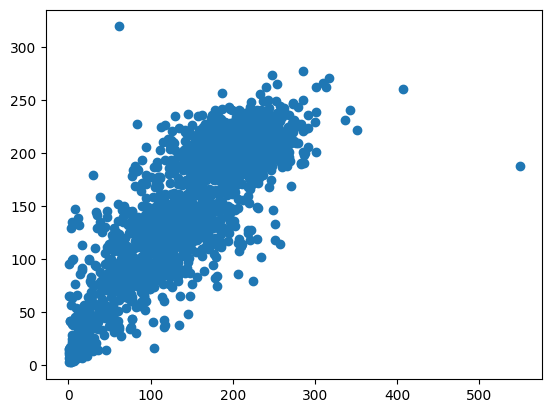

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

model = RandomForestRegressor()

model.fit(X_train_preprocessed, y_train)
y_pred = model.predict(X_test_preprocessed)

mean_error = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)
print(mean_error)

plt.scatter(y_test, y_pred)